In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler

from torchvision import transforms
import torchvision.datasets

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (15.0,10.0)

import numpy as np
import random

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


In [2]:
data_train = dset.SVHN('./data/', split='train')
data_test = dset.SVHN('./data/', split='test' )


X_train = torch.FloatTensor(data_train.data)
y_train = torch.LongTensor(data_train.labels)
X_test = torch.FloatTensor(data_test.data)
y_test = torch.LongTensor(data_test.labels)

In [3]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [4]:
X_train /= 255.
X_test /= 255.

In [5]:
X_train = X_train.permute(0, 3, 2, 1)

tensor(5)

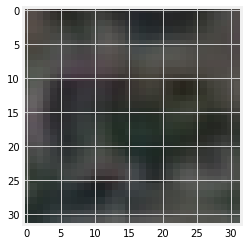

In [6]:
plt.imshow(X_train[13311]);
y_train[13311]

In [7]:
X_train.shape

torch.Size([73257, 32, 32, 3])

In [8]:
X_train = X_train.permute(0, 3, 2, 1)

In [9]:
class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        #1 слой
        self.conv1 = torch.nn.Conv2d(in_channels = 3,
                                     out_channels = 12,
                                     kernel_size = 5,
                                     padding = 2)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2,
                                        stride=2)
        #2 слой
        self.conv2 = torch.nn.Conv2d(in_channels = 12,
                                     out_channels = 24,
                                     kernel_size = 5,
                                     padding = 2)
        
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2,
                                        stride=2)
        
        #3 слой
        self.conv3 = torch.nn.Conv2d(in_channels = 24,
                                     out_channels = 48,
                                     kernel_size = 3,
                                     padding = 1)
        self.act3 = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2,
                                        stride=2)
        
        
        #4 слой
        self.fc1 = torch.nn.Linear(4*4*48,120)
        self.act4 = torch.nn.ReLU()
        
        #5 слой
        self.fc2 = torch.nn.Linear(120,84)
        self.act5 = torch.nn.ReLU()
        
        #6 слой
        self.fc3 = torch.nn.Linear(84,10)


        #self.sm = torch.nn.Softmax(dim = 1)
        
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act4(x)
        x = self.fc2(x)
        x = self.act5(x)
        x = self.fc3(x)
        
        return x
    
#    def inference(self,x):
#        x = self.forward(x)
#        x = self.sm(x)
#        return x
    
lenet = LeNet()

In [10]:
torch.cuda.is_available()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet = lenet.to(device)

In [11]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(lenet.parameters(), lr = 1.0e-3)


In [12]:
batch_size = 1000

test_accuracy_history = []
test_loss_history = []

for epoch in range(100):
    #s = datetime.now()
    order = np.random.permutation(len(X_train))
    for start_index in range(0,len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet.forward(X_batch)
        
        loss_val = loss(preds, y_batch)
        loss_val.backward()
        
        optimizer.step()
        
    test_preds = lenet.forward(X_test)
    test_loss_history.append(loss(test_preds,y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    
    test_accuracy_history.append(accuracy)
    if epoch%1==0:
        print(accuracy, 'after ', epoch, ' epochs')
        
    if accuracy>=0.91:
        print('Final accuracy is ', accuracy)
        break
        

tensor(0.1959) after  0  epochs
tensor(0.2260) after  1  epochs
tensor(0.4523) after  2  epochs
tensor(0.6563) after  3  epochs
tensor(0.7223) after  4  epochs
tensor(0.7570) after  5  epochs
tensor(0.7519) after  6  epochs
tensor(0.7863) after  7  epochs
tensor(0.8037) after  8  epochs
tensor(0.8195) after  9  epochs
tensor(0.8316) after  10  epochs
tensor(0.8378) after  11  epochs
tensor(0.8473) after  12  epochs
tensor(0.8491) after  13  epochs
tensor(0.8460) after  14  epochs
tensor(0.8549) after  15  epochs
tensor(0.8616) after  16  epochs
tensor(0.8640) after  17  epochs
tensor(0.8659) after  18  epochs
tensor(0.8626) after  19  epochs
tensor(0.8712) after  20  epochs
tensor(0.8755) after  21  epochs
tensor(0.8768) after  22  epochs
tensor(0.8690) after  23  epochs
tensor(0.8803) after  24  epochs
tensor(0.8806) after  25  epochs
tensor(0.8826) after  26  epochs
tensor(0.8833) after  27  epochs
tensor(0.8869) after  28  epochs
tensor(0.8843) after  29  epochs
tensor(0.8870) after

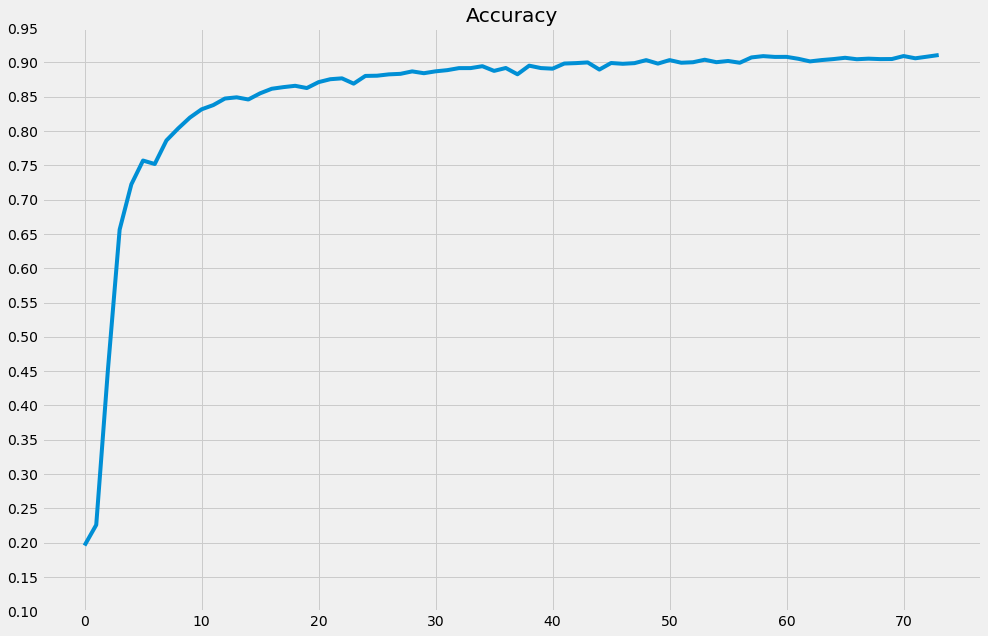

In [15]:
#plt.figure(figsize=(10,10))
plt.plot(test_accuracy_history)
plt.yticks(np.arange(.1,1,.05))
plt.title('Accuracy');

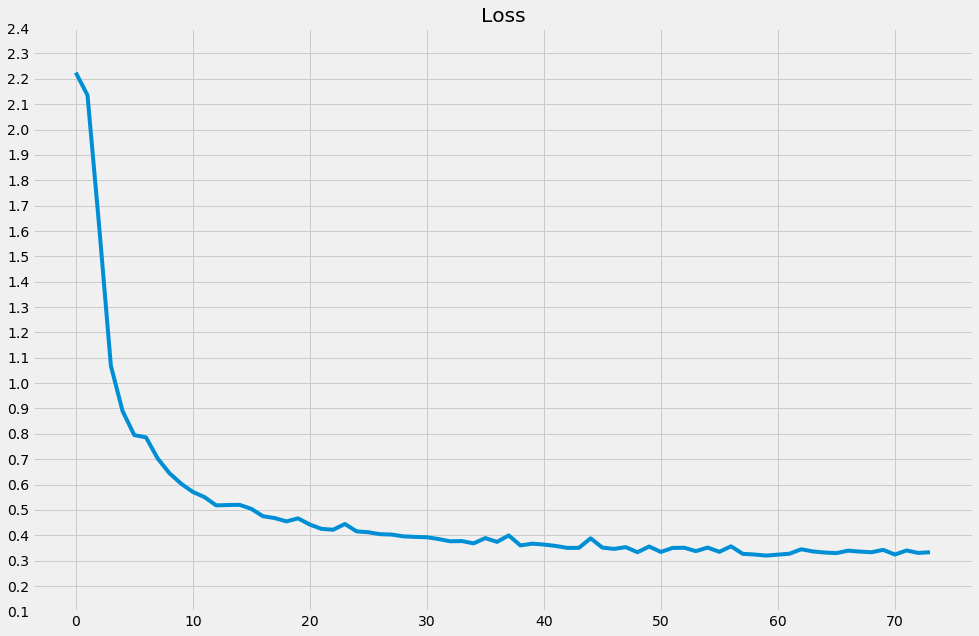

In [16]:
plt.plot(test_loss_history)
plt.yticks(np.arange(.1,2.5,.1))
plt.title('Loss');